<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Исследование данных</a></span><ul class="toc-item"><li><span><a href="#Первый-регион" data-toc-modified-id="Первый-регион-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Первый регион</a></span></li><li><span><a href="#Второй-регион" data-toc-modified-id="Второй-регион-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Второй регион</a></span></li><li><span><a href="#Третий-регион" data-toc-modified-id="Третий-регион-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Третий регион</a></span></li></ul></li><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Признаки**
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (описание не представлено);

**Целевой признак**
- product — объём запасов в скважине (тыс. баррелей).

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Загрузка и подготовка данных

Ознакомление с данными

In [2]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    print('Не удалось прочитать файл')

Посмотрим первые 5 строк в каждом датафрейме

In [3]:
display(data_0.head())
display()
display(data_1.head())
display()
display(data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


В данных всего 5 столбцов,  столбец ID для задачи ценности не несет. Удалим его ( после полного ознакомления с данными). Затем выведем основную информацию о датафремах.

In [4]:
display(data_0.info())
display()
display(data_1.info())
display()
display(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Пропусков в данных нет. Теперь проверим наличие явных дубликатов.

In [5]:
print('Количество явных дубликатов для первого датафрейма:', data_0.duplicated().sum())
print('Количество явных дубликатов для второго датафрейма:', data_1.duplicated().sum())
print('Количество явных дубликатов для третьего датафрейма:', data_2.duplicated().sum())


Количество явных дубликатов для первого датафрейма: 0
Количество явных дубликатов для второго датафрейма: 0
Количество явных дубликатов для третьего датафрейма: 0


Отлично, явные дубликаты не найдены. Удалим не информативный столбец ID

In [6]:
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)

**Вывод:**
- в каждом датафрейме по 100 000 строк;
- пропуски в данных отсутствуют;
- типы данных не требуют замены;
- явные дубликаты отсутствуют;
- в данных присутствует столбец ID, который не несет ценности для обучения модели (столбец удален).

### Исследование данных

Продолжим исследовние данных. Для каждого региона проверим наличие корреляции в данных, а также построим диаграммы размаха (проверим есть ли выбивающиеся знаечения).

#### Первый регион

In [7]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


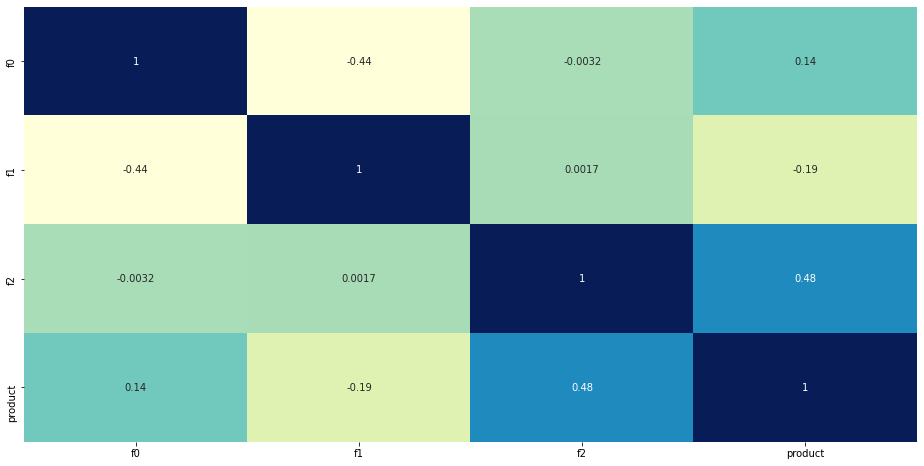

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(data_0.corr(),  cmap='YlGnBu', annot=True, cbar= False)
plt.show()

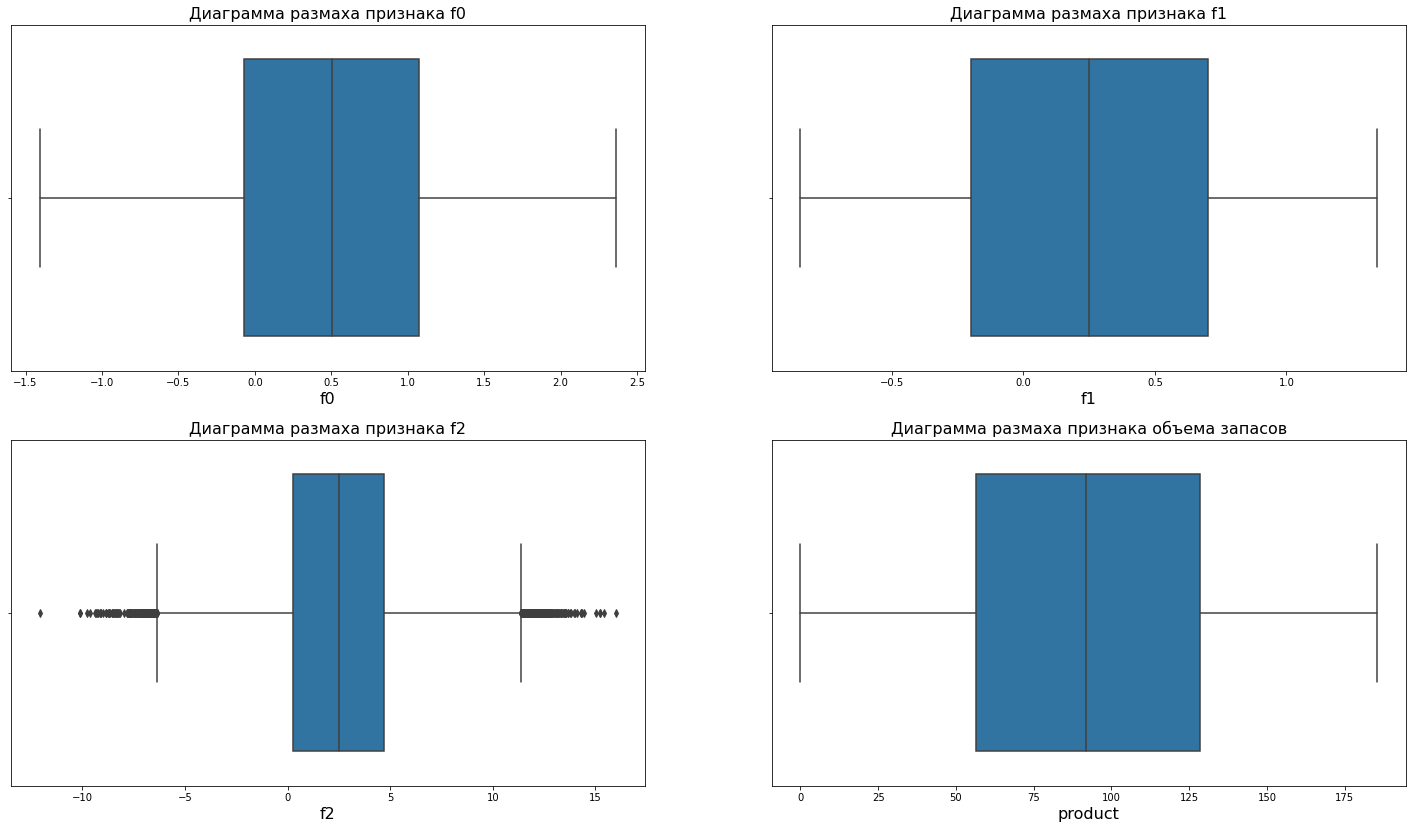

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(25,14))
sns.set_style("white")

sns.boxplot(data = data_0, x='f0', ax=axes[0,0])
axes[0,0].set_title('Диаграмма размаха признака f0', fontsize=16)
axes[0,0].set_xlabel('f0', fontsize=16)


sns.boxplot(data = data_0, x='f1', ax=axes[0,1])
axes[0,1].set_title('Диаграмма размаха признака f1', fontsize=16)
axes[0,1].set_xlabel('f1', fontsize=16)

sns.boxplot(data = data_0, x='f2', ax=axes[1,0])
axes[1,0].set_title('Диаграмма размаха признака f2', fontsize=16)
axes[1,0].set_xlabel('f2', fontsize=16)

sns.boxplot(data = data_0, x='product', ax=axes[1,1])
axes[1,1].set_title('Диаграмма размаха признака объема запасов', fontsize=16)
axes[1,1].set_xlabel('product', fontsize=16)

plt.show()


#### Второй регион

In [10]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


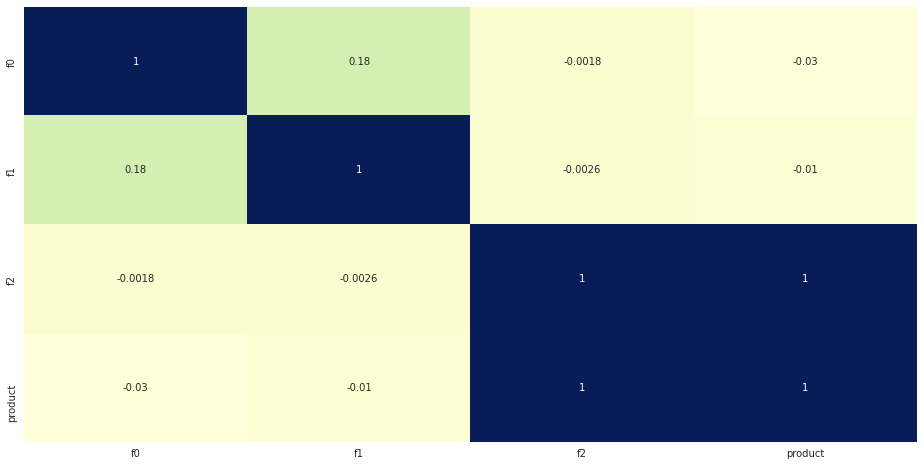

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(data_1.corr(),  cmap='YlGnBu', annot=True, cbar= False)
plt.show()

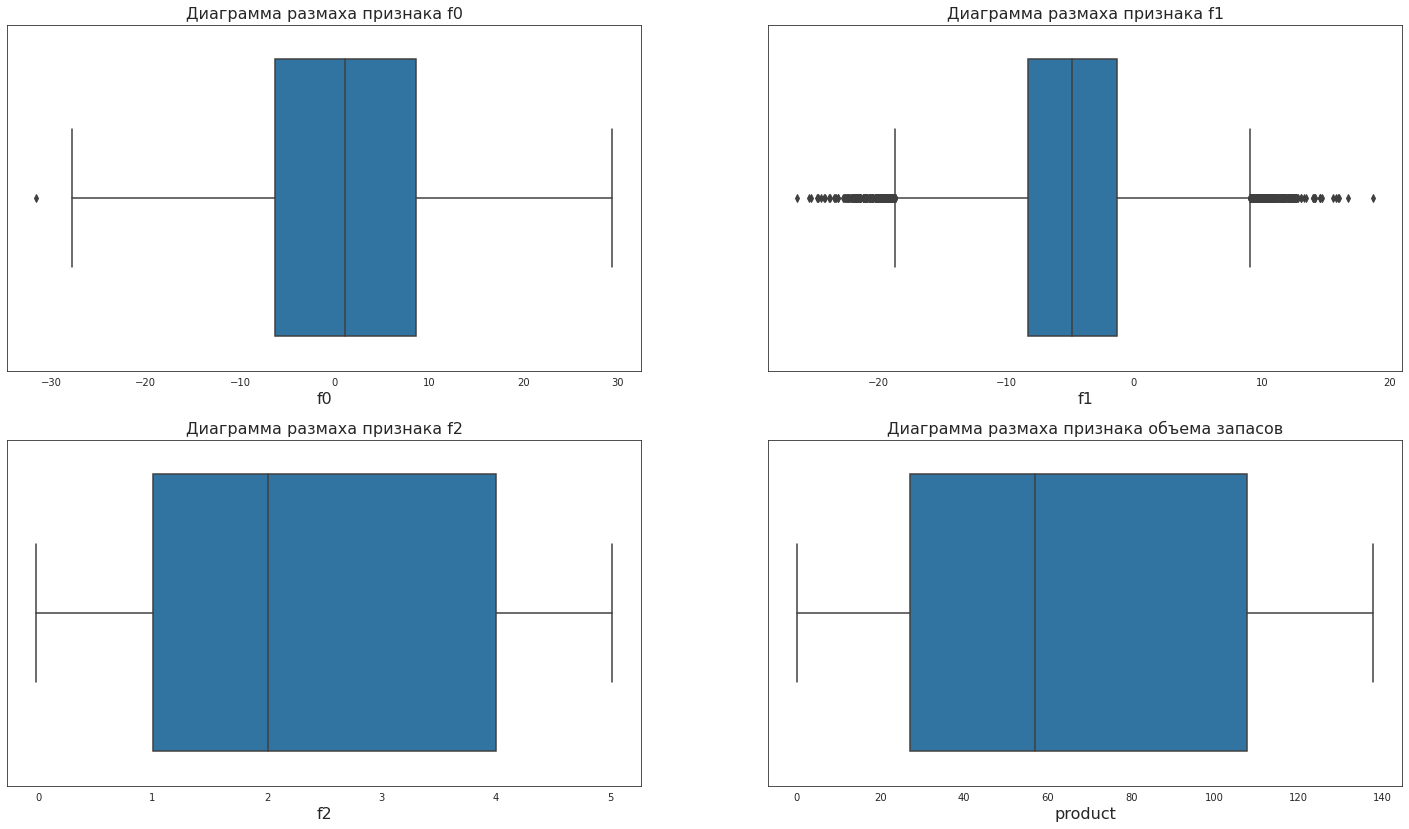

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(25,14))
sns.set_style("white")

sns.boxplot(data = data_1, x='f0', ax=axes[0,0])
axes[0,0].set_title('Диаграмма размаха признака f0', fontsize=16)
axes[0,0].set_xlabel('f0', fontsize=16)


sns.boxplot(data = data_1, x='f1', ax=axes[0,1])
axes[0,1].set_title('Диаграмма размаха признака f1', fontsize=16)
axes[0,1].set_xlabel('f1', fontsize=16)

sns.boxplot(data = data_1, x='f2', ax=axes[1,0])
axes[1,0].set_title('Диаграмма размаха признака f2', fontsize=16)
axes[1,0].set_xlabel('f2', fontsize=16)

sns.boxplot(data = data_1, x='product', ax=axes[1,1])
axes[1,1].set_title('Диаграмма размаха признака объема запасов', fontsize=16)
axes[1,1].set_xlabel('product', fontsize=16)

plt.show()


#### Третий регион

In [13]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


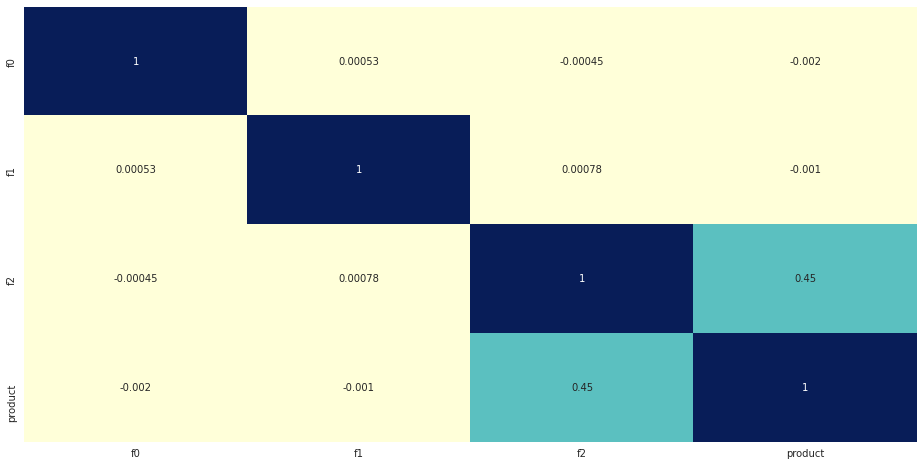

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(data_2.corr(),  cmap="YlGnBu", annot=True, cbar= False)
plt.show()

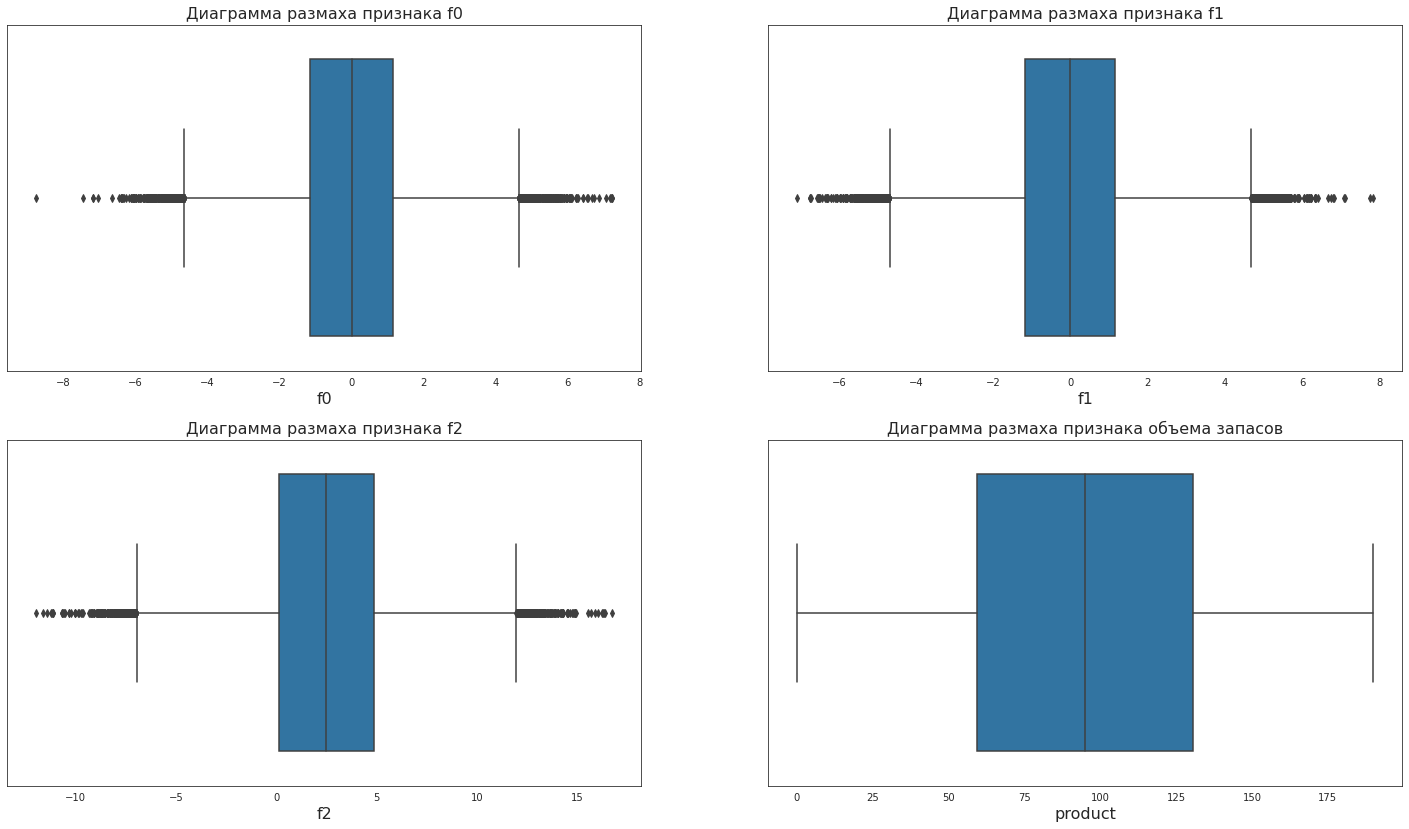

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(25,14))
sns.set_style("white")

sns.boxplot(data = data_2, x='f0', ax=axes[0,0])
axes[0,0].set_title('Диаграмма размаха признака f0', fontsize=16)
axes[0,0].set_xlabel('f0', fontsize=16)


sns.boxplot(data = data_2, x='f1', ax=axes[0,1])
axes[0,1].set_title('Диаграмма размаха признака f1', fontsize=16)
axes[0,1].set_xlabel('f1', fontsize=16)

sns.boxplot(data = data_2, x='f2', ax=axes[1,0])
axes[1,0].set_title('Диаграмма размаха признака f2', fontsize=16)
axes[1,0].set_xlabel('f2', fontsize=16)

sns.boxplot(data = data_2, x='product', ax=axes[1,1])
axes[1,1].set_title('Диаграмма размаха признака объема запасов', fontsize=16)
axes[1,1].set_xlabel('product', fontsize=16)

plt.show()


**Вывод:**
- сделать вывод о достаточно больших и мальниких значений для признаков f1,f2,f3 тяжело, так как сутевая их составляющая нам не известна, но можно сказать про запасы - сверх значений (условно 10 млн баррелей нефти) или отрицатльных запасов не наблюдается.
-  выборосы (значения, лежащие за границами "усов" диаграммы размаха) по всем регоинам присутствует по 1 признаку, а по третьему региону и всем 3 признакам), при это сделать вывод дествительно ли это выборсы или редкая особенность регионов затруднительно.
- Отметим,что по второму регоину наблюдается прямая корреляция между признаком f2 и запасами.

### Подготовка данных к обучению

Выделим обучающую и валидационную выборки.

In [16]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    data_0.drop(['product'], axis=1), data_0['product'], test_size=0.25, random_state=12345)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    data_1.drop(['product'], axis=1), data_1['product'], test_size=0.25, random_state=12345)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    data_2.drop(['product'], axis=1), data_2['product'], test_size=0.25, random_state=12345)

Выполним проверку корректно ли разделились данные.

In [17]:
print('=====================================================================================================================') 
print('Первый регион:') 
print('Размер обучающей выборки составялет', features_train_0.shape[0]) 
print('Размер валидационной выборки составялет', features_valid_0.shape[0])
print('=====================================================================================================================') 
print('Второй регион:') 
print('Размер обучающей выборки составялет', features_train_1.shape[0]) 
print('Размер валидационной выборки составялет', features_valid_1.shape[0])
print('=====================================================================================================================') 
print('Третий регион:') 
print('Размер обучающей выборки составялет', features_train_2.shape[0]) 
print('Размер валидационной выборки составялет', features_valid_2.shape[0])
print('=====================================================================================================================') 

Первый регион:
Размер обучающей выборки составялет 75000
Размер валидационной выборки составялет 25000
Второй регион:
Размер обучающей выборки составялет 75000
Размер валидационной выборки составялет 25000
Третий регион:
Размер обучающей выборки составялет 75000
Размер валидационной выборки составялет 25000


75% на обучение, 25% на валидиацию. Следующим шагом проведем масштабирование данных, для этого напишем общую функцию.

In [18]:
def get_scaler(features_train, features_valid):
    numeric = [column for column in features_train]

    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    return features_train, features_valid

In [19]:
#Масштабирование признаков для первого региона
features_train_0, features_valid_0 = get_scaler(features_train_0, features_valid_0)
#Масштабирование признаков для второго региона
features_train_1, features_valid_1 = get_scaler(features_train_1, features_valid_1)
#Масштабирование признаков для третьего региона
features_train_2, features_valid_2 = get_scaler(features_train_2, features_valid_2)

**Вывод:**
- исходные данные разделены на обучающую и валидационную выборки в соотношении 75:25 соответственно;
- учитывая, что категориальных признаков в данных нет кодировка признаков не трбуется;
- выполнено масштабирование численных признаков для стандартизации.

## Обучение и проверка модели

Перейдем к обучению моделей. 

Первым шагом напишем вспомогательные функции:
- для обучения модели линейной регрессии;
- для получения прогноза, при этом индексы прогноза преобразуем по индексами исходных ответов

In [20]:
def get_fit_lin_regress_model(features, target):
    model = LinearRegression()
    model.fit(features, target)
    return model

def get_predictions(model, features_valid, indexes):
    predictions = model.predict(features_valid)
    np_array = np.array(predictions)
    tranform_predictions = pd.Series(np_array, index = indexes)
    return tranform_predictions

Теперь приступим непосредственно к обучению и оценке качества прогноза на валидацонной выборке. Вычислим основные метрики для задачи регресии (MSE, RMSE, R2), а также посчитаем средний запас прогнозируеймы и реальный.

In [21]:
#Первый регион
lin_regress_model_0 = get_fit_lin_regress_model(features_train_0, target_train_0)
prediction_reg_0 = get_predictions(lin_regress_model_0, features_valid_0, target_valid_0.index)

mse_0 = mean_squared_error(target_valid_0, prediction_reg_0)
rmse_0 = mse_0 ** 0.5
r2_0 = r2_score(target_valid_0, prediction_reg_0)
prediction_mean_0 = prediction_reg_0.mean()
target_mean_0 = target_valid_0.mean()

In [22]:
#Второй регион
lin_regress_model_1 = get_fit_lin_regress_model(features_train_1, target_train_1)
prediction_reg_1 = get_predictions(lin_regress_model_1, features_valid_1, target_valid_1.index)

mse_1 = mean_squared_error(target_valid_1, prediction_reg_1)
rmse_1 = mse_1 ** 0.5
r2_1 = r2_score(target_valid_1, prediction_reg_1)
prediction_mean_1 = prediction_reg_1.mean()
target_mean_1 = target_valid_1.mean()

In [23]:
#Третий регион
lin_regress_model_2 = get_fit_lin_regress_model(features_train_2, target_train_2)
prediction_reg_2 = get_predictions(lin_regress_model_2, features_valid_2, target_valid_2.index)

mse_2 = mean_squared_error(target_valid_2, prediction_reg_2)
rmse_2 = mse_2 ** 0.5
r2_2 = r2_score(target_valid_2, prediction_reg_2)
prediction_mean_2 = prediction_reg_2.mean()
target_mean_2 = target_valid_2.mean()

In [24]:
results = pd.DataFrame(
    {'MSE':                          [round(mse_0,3), round(mse_1,3), round(mse_2,3)],
     'RMSE':                         [round(rmse_0,3), round(rmse_1,3), round(rmse_2,3)],
     'R2':                           [round(r2_0,4), round(r2_1,4), round(r2_2,4)],
     'Средний запас':                [round(target_mean_0,4), round(target_mean_1,4), round(target_mean_2,4)],
     'Средний прогнозируемый запас': [round(prediction_mean_0,4), round(prediction_mean_1,4), round(prediction_mean_2,4)],
    }, 
    index=['1 регион','2 регион','3 регион']
)
results

,MSE,RMSE,R2,Средний запас,Средний прогнозируемый запас
1 регион,1412.213,37.579,0.2799,92.0786,92.5926
2 регион,0.798,0.893,0.9996,68.7231,68.7285
3 регион,1602.378,40.030,0.2052,94.8842,94.9650


Анализируя результаты обучения и проверки на валидационной выборке можно сделать следующие выводы:
- модель линейной регрессии на имеющихся данных показывают не плохие рузльтаты;
- на всех данных метрика R2 > 0 и в целом показывает, что модель прогнозирует лучше, чем случайный предиктор;
- минимальное значение метрики RMSE по второму региону, при этом R2 стремится к 1, сказывается прямая корреляция одного из признаков с объемом запасов.

## Подготовка к расчёту прибыли

Услоивя задачи:
- при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки; 
- бюджет на разработку скважин в регионе — 10 млрд рублей; 
- при нынешних ценах один баррель сырья приносит 450 рублей дохода; 
- доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [25]:
# Константы из условий задачи:
MAX_POINTS = 500
COUNT_POINTS = 200
BUGET_OF_REG = 10 ** 10
PRICE = 450 * 10 ** 3

Посчитаем объём сырья для безубыточной разработки новой скважины и сравним полученное значение со средним запасом в каждом регионе. 

In [26]:
breakeven = BUGET_OF_REG / PRICE / COUNT_POINTS
print('Объём сырья для безубыточной разработки новой скважины составялет {:.2f}'.format(breakeven), 'тыс баррелей')
print('Средний объем запасов скважины в первом регионе составялет {:.2f}'.format(data_0['product'].mean()), 'тыс баррелей')
print('Средний объем запасов скважины во втором регионе составялет {:.2f}'.format(data_1['product'].mean()), 'тыс баррелей')
print('Средний объем запасов скважины в третьем регионе составялет {:.2f}'.format(data_2['product'].mean()), 'тыс баррелей')

Объём сырья для безубыточной разработки новой скважины составялет 111.11 тыс баррелей
Средний объем запасов скважины в первом регионе составялет 92.50 тыс баррелей
Средний объем запасов скважины во втором регионе составялет 68.83 тыс баррелей
Средний объем запасов скважины в третьем регионе составялет 95.00 тыс баррелей


**Вывод:**
- исходя из условий задачи - объем сырья для безубыточной разработки новой скважины составялет 111.11 тыс баррелей;
- объем запасов по представленным данным в регионах существенно ниже "точки безубыточности";
- существенно выделяется второй регион, средние запасы ниже более чем в 1,5 раза по сравнению с "точкой безубыточности", при этом обученная модель очень хорошо прогнозирует запасы скважин именно в этом регионе (R2 = 1, минимальное значение RMSE).

## Расчёт прибыли и рисков 

Для начала напишем функции расчета прибыли, bootsrtap-а, расчета доверительного интервала и риска убытков.

In [27]:
def get_profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:COUNT_POINTS]
    return PRICE * selected.sum() - BUGET_OF_REG

def bootsrtap(target, predictions):
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(1000):
        target_subsample = target.sample(n = MAX_POINTS, replace = True, random_state = state)
        predictions_subsample = predictions[target_subsample.index]
        values.append(get_profit(target_subsample, predictions_subsample))

    values = pd.Series(values)
    return values 

def get_confidence_interval(values, lower, upper):
    return(
        round(values.quantile(lower) / 10 ** 6, 2), #для удобства перевод в млн руб. и округление до 2 знаков
        round(values.quantile(upper) / 10 ** 6, 2)  #для удобства перевод в млн руб. и округление до 2 знаков
    ) 

def get_risk_of_loss(values):
    return st.percentileofscore(values, 0)

Найдем распределение возможной прибыли для каждого региона.

In [28]:
profit_distribution_0 = bootsrtap(target_valid_0, prediction_reg_0)
profit_distribution_1 = bootsrtap(target_valid_1, prediction_reg_1)
profit_distribution_2 = bootsrtap(target_valid_2, prediction_reg_2)

Посчитаем среднюю прибыль для каждого региона и дл удобства переведем из руб в млн руб.

In [29]:
mean_profit_0 = round(profit_distribution_0.mean() / 10 ** 6, 2) #для удобства перевод в млн руб. и округление до 2 знаков
mean_profit_1 = round(profit_distribution_1.mean() / 10 ** 6, 2) #для удобства перевод в млн руб. и округление до 2 знаков
mean_profit_2 = round(profit_distribution_2.mean() / 10 ** 6, 2) #для удобства перевод в млн руб. и округление до 2 знаков

Определим 95% доверительный интервал для каждого региона

In [30]:
confidence_interval_0 = get_confidence_interval(profit_distribution_0, 0.025, 0.975)
confidence_interval_1 = get_confidence_interval(profit_distribution_1, 0.025, 0.975)
confidence_interval_2 = get_confidence_interval(profit_distribution_2, 0.025, 0.975)

Определим вероятность убытков по регионам

In [31]:
risk_of_loss_0 = str(get_risk_of_loss(profit_distribution_0)) + '%'
risk_of_loss_1 = str(get_risk_of_loss(profit_distribution_1)) + '%'
risk_of_loss_2 = str(get_risk_of_loss(profit_distribution_2)) + '%'

Сведем результаты средний прибыли, 95% доверительного интервала и вероятности убытков в разрезе регионов в итоговую таблицу.

In [32]:
results = pd.DataFrame(
    {'Средняя прибыль, млн руб.':              [mean_profit_0, mean_profit_1, mean_profit_2],
     '95%-й доверительный интервал, млн руб.': [confidence_interval_0, confidence_interval_1, confidence_interval_2],
     'Вероятность убытков':                    [risk_of_loss_0, risk_of_loss_1, risk_of_loss_2]
    }, 
    index=['1 регион','2 регион','3 регион']
)

results

,"Средняя прибыль, млн руб.","95%-й доверительный интервал, млн руб.",Вероятность убытков
1 регион,425.94,"(-102.09, 947.98)",6.0%
2 регион,515.22,"(68.87, 931.55)",1.0%
3 регион,435.01,"(-128.88, 969.71)",6.4%


**Вывод:**
- на предыдущем этапе были рассчитаны средние запасы в разрезе регионов и определён минимальный запас для безубыточной разработки месторождения (111.11 тыс баррелей);
- регион с минимальными средними запасами - второй (68.8 тыс баррелей) и по предварительной оценки этот регион не подходил под разработку скважин;
- не смотря на то, что во втором регионе запасы минимальные, вероятность убытков в данном регионе минимальная (около 1%) с наибольшем значением средний прибыли (515 млн руб.); 
- Справочно для первого и третьего региона вероятность убытков составляет от 6% до 6.4%, а средняя прибыль от 425 до 435 млн руб. 

**Таким образом, второй регион предлагается для разработки.**


## Общий вывод

- Для анализа представлены данные по 3 регионам, которые содержат 3 признака (сутевая составляющая их пре представлена) и объем запасов.
- Представленные для анализа данные довольно "чистые" с точки зрения наличия пропусков и явных дубликатов;
- В признаках f0,f1,f2 присутствуют значения, которые лежат за границами усов диаграммы размаха, но учитывая, что сутевая составляющая этих признаков не представлена - сделать вывод, что это выбросы и такие значения подлежат исключению анализа будет не самым правильным подходом.
- Для каждого региона построена модель линейной регрессии. Наилучшие результаты по метрикам RMSE и R2 у второго региона, метрики на валидационный выборке равны 0.893 и 0.9996 соответственно. Сказывает прямая корреляция. Также средний предсказанный объем запасов по второму региону довольно близок к истинному (до 2 знаков после запятой).
- после чего для каждого региона были определены значения средней возможной прибыли, 95%-й доверительный интервал и вероятность убытков. При том, что у второго региона прогнозируемый средний запас меньше чем у других, среднее значение возможной прибыли наибольшее (515 млн руб.) при этому вероятность убытков минимальная (1%).
- таким образом, второй регион предлагается для разработки.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован